В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике

Задание
1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения
3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
4. Проанализируйте CTR с разбивкой по рекламной кампании.
5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
7. Посчитайте конверсию из клика в покупку.

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются. \
Сколько уникальных рекламных кампаний было проведено? 

In [94]:
conversion = pd.read_csv('./conversion.csv')

In [5]:
conversion.head()

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1

In [6]:
conversion.shape

(1143, 11)

In [7]:
conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [8]:
conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [12]:
conversion.xyz_campaign_id.nunique()

3

2. Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.

In [20]:
fb_imp = conversion.groupby('fb_campaign_id') \
    .agg({'Impressions': 'sum'})

In [22]:
sns.distplot(fb_imp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [34]:
sns.distplot(np.log(fb_imp.Impressions), kde=False, bins=50)
sns.despine()

3. Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность. \
    Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [95]:
conversion['ctr'] = conversion.Clicks / conversion.Impressions

In [73]:
conversion[['ad_id', 'ctr']].set_index('ad_id').idxmax()

ctr    738637
dtype: int64

In [74]:
conversion.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

4. Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id).  Какому графику соответствует распределение CTR кампании 916?



<AxesSubplot:xlabel='ctr'>

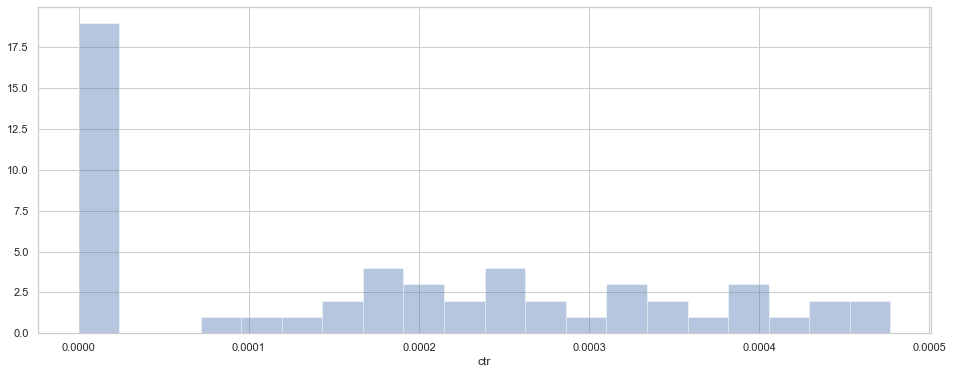

In [75]:
sns.distplot(conversion.query('xyz_campaign_id == 916').ctr, kde=False, bins=20)

5. CPC (cost-per-click) – стоимость за клик пользователя по объявлению. \
    Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.



In [96]:
conversion['cpc'] = conversion.Spent / conversion.Clicks

In [77]:
conversion.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpc'>

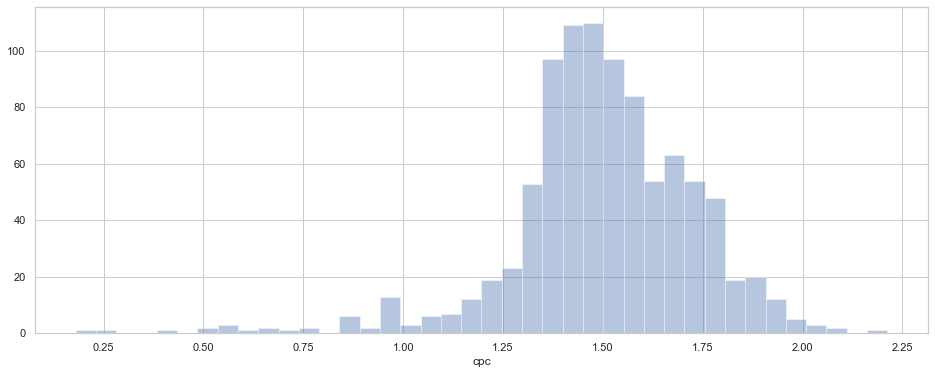

In [78]:
sns.distplot(conversion.dropna().cpc, kde=False)

In [79]:
ss.iqr(conversion.cpc, nan_policy='omit').round(2)

0.25

6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


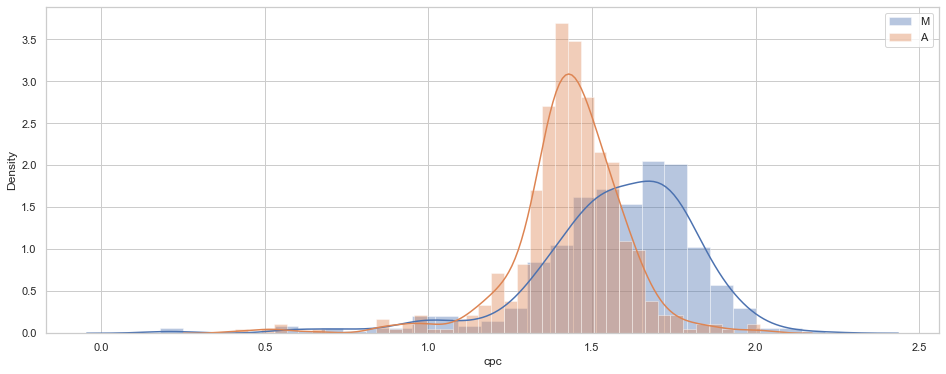

In [92]:
sns.distplot(conversion.query('gender == "M"').dropna().cpc, label='M')
sns.distplot(conversion.query('gender == "F"').dropna().cpc, label='А')
plt.legend()

7. Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [97]:
conversion.head(3)

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  \
0         7350       1   1.43                 2                    1   
1        17861       2   1.82                 2                    0   
2          693       0   0.00                 1                    0   

        ctr   cpc  
0  0.000136  1.43  
1  0.000112  0.91  
2  0.000000   NaN

In [100]:
conversion['cr_app'] = (conversion.Approved_Conversion / conversion.Clicks).mul(100).round(2)

In [103]:
conversion.query('ad_id == 1121814').cr_app

860    3.09
Name: cr_app, dtype: float64